### 31444 Mehul
### Assignment - 8

Features: The titanic dataset has roughly the following types of features:

    - Categorical/Nominal: Variables that can be divided into multiple categories but having no order or priority. 
    Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
    - Binary: A subtype of categorical features, where the variable has only two categories. 
    Eg: Sex (Male/Female)
    - Ordinal: They are similar to categorical features but they have an order(i.e can be sorted). 
    Eg. Pclass (1, 2, 3)
    - Continuous: They can take up any value between the minimum and maximum values in a column. 
    Eg. Age, Fare
    - Count: They represent the count of a variable. 
    Eg. SibSp, Parch
    - Useless: They don’t contribute to the final outcome of an ML model. Here, PassengerId, Name, Cabin and Ticket might fall into this category.

In [116]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [117]:
data = pd.read_csv("titanic.csv")

In [118]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
data.drop(columns=["Cabin","PassengerId","Name","Ticket"],inplace=True)
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [120]:
data["Age"].fillna(value=data["Age"].median(), inplace=True)
data["Embarked"] = data["Embarked"].fillna('S')
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [121]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [122]:
data["Age"]= data["Age"].astype("int")

In [123]:
# seperate the data into numeric and categorical
data_num = data[['Age','SibSp','Parch','Fare']]
data_cat = data[['Survived','Pclass','Sex']]

#### 1. Finding patterns in the data

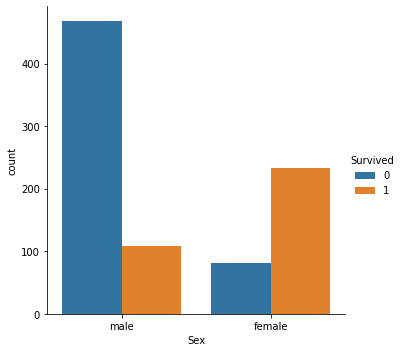

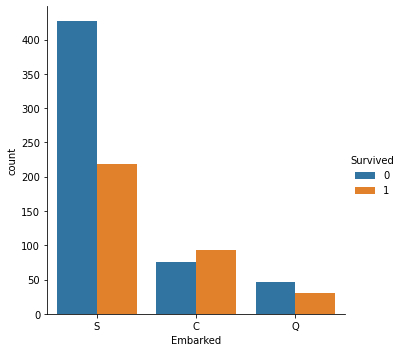

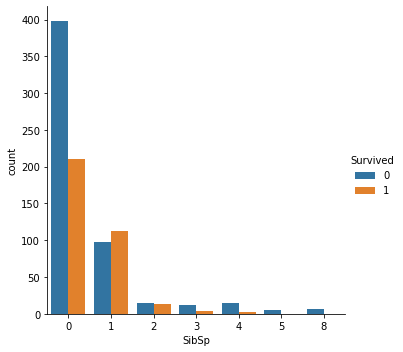

In [124]:
sb.catplot(x="Sex", hue="Survived",kind="count",data=data)
sb.catplot(x="Embarked", hue="Survived",kind="count",data=data)
sb.catplot(x="SibSp", hue="Survived",kind="count",data=data)


it can be approximated that the survival rate of men is around 20% and that of women is around 75%.

##### Pclass(Ordinal) vs Survived

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

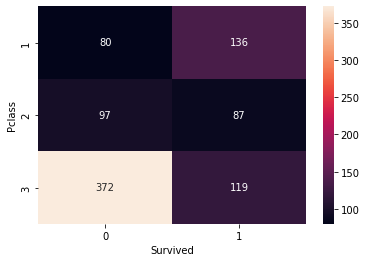

In [125]:
group = data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack() #creates a 2d matrix wrt Pclass

# Heatmap - Color encoded 2D representation of data.
sb.heatmap(pclass_survived, annot = True, fmt ="d")              

#### Plots for numeric data

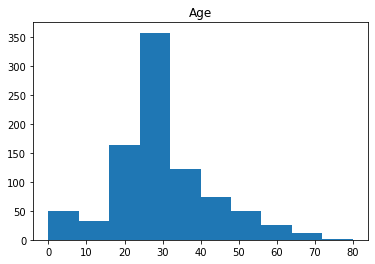

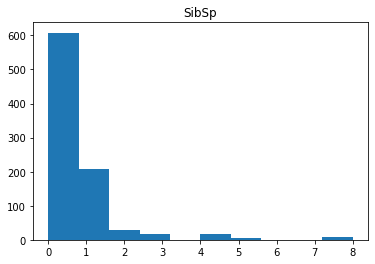

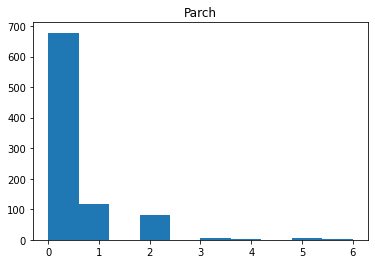

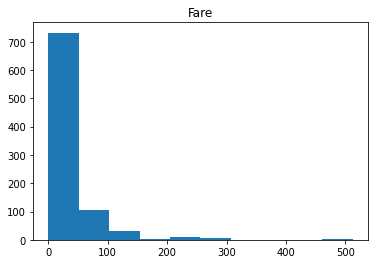

In [126]:
for i in data_num:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

 most of the distributions are scattered, except Age, it’s pretty normalized. 

#### Plots for categorical Data

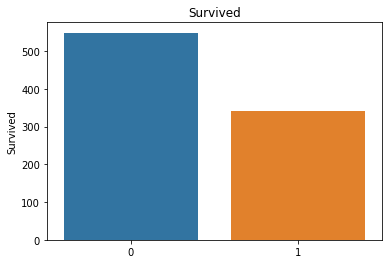

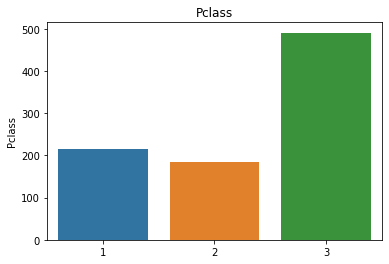

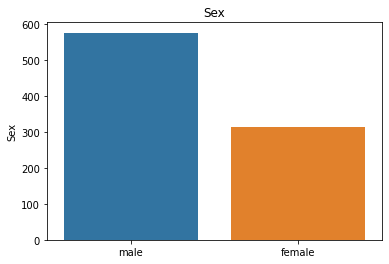

In [127]:
for i in data_cat.columns:
    sb.barplot(data_cat[i].value_counts().index,data_cat[i].value_counts()).set_title(i)
    plt.show()

#### Histogram

<AxesSubplot:xlabel='Age'>

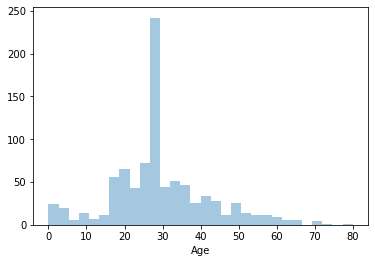

In [128]:
sb.distplot(data["Age"],kde=False,bins=30)

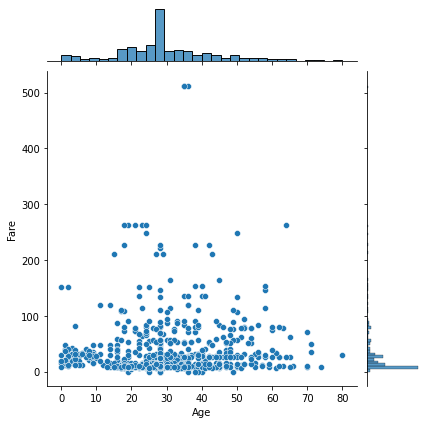

In [129]:
sb.jointplot(x='Age', y='Fare', data=data)

###### A distribution plot at the top for the column on the x-axis, a distribution plot on the right for the column on the y-axis and a scatter plot in between that shows the mutual distribution of data for both the columns. You can see that there is no correlation observed between prices and the fares.

#### 2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

<AxesSubplot:xlabel='Fare'>

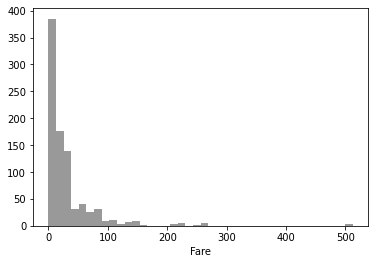

In [130]:
sb.distplot(data["Fare"],kde=False,bins=40, color='black')
# It is not normally distributed(right-only)

#### Looking for outliers

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

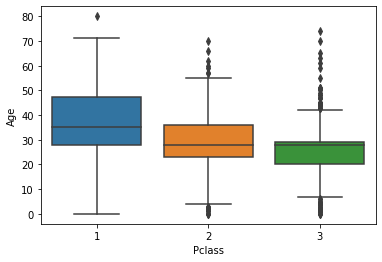

In [131]:
sb.boxplot(x='Pclass', y='Age', data=data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

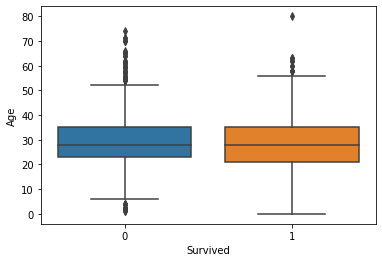

In [132]:
sb.boxplot(x='Survived', y='Age', data=data)

To summarize, here’re the characteristics of survivors compared to victims.

    1. Survivors were more likely to have parents / children aboard the Titanic and have relatively more expensive tickets.
    2. Children were more likely to survive compared to victims among all age groups.
    Passengers with missing age were less likely to be survivors.
    3. Passengers with higher pclass were more likely to survive.
    4. Women were much more likely to survive than men.
    5. Passengers embarked at Cherbourg had a higher chance to survive than passengers embarked at Queenstown and Southampton.